In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''

    side_a --> Always the government side in interstate conflicts

    side_b --> In an interstate conflict this includes a military opposition organization

    year --> Indicates which year the particular data corresponds to

    start_date --> Start date of the conflict, determined by the first recorded battle-related death in the conflict.

    ep_end --> Indicates whether the conflict becomes inactive next year:
        1 = The conflict ends next year
        2 = The conflict is still active
    
        
    ep_end_date --> For only ep_end == 1, indictaes the date when the conflict activity ended

    intensity_level --> Intensity of violence of the conflict for that year
        1 = Minor (25 - 999 deaths)
        2 = War (1000+ Deaths)
        

    conflict_id --> The unique identifier of the conflict


    type_of_conflict --> One of four structural conflict types
        1 = Extrasystemic (colonial/external)
        2 = Interstate (state vs. state)
        3 = Intrastate (state vs. rebel group, no foreign troop involvement)
        4 = Internationalized Intrastate (intrastate + foreign state involvement)

'''

'\n\n    side_a --> Always the government side in interstate conflicts\n\n    side_b --> In an interstate conflict this includes a military opposition organization\n\n    year --> Indicates which year the particular data corresponds to\n\n    start_date --> Start date of the conflict, determined by the first recorded battle-related death in the conflict.\n\n    ep_end --> Indicates whether the conflict becomes inactive next year:\n        1 = The conflict ends next year\n        2 = The conflict is still active\n\n\n    ep_end_date --> For only ep_end == 1, indictaes the date when the conflict activity ended\n\n    intensity_level --> Intensity of violence of the conflict for that year\n        1 = Minor (25 - 999 deaths)\n        2 = War (1000+ Deaths)\n\n\n    conflict_id --> The unique identifier of the conflict\n\n\n    type_of_conflict --> One of four structural conflict types\n        1 = Extrasystemic (colonial/external)\n        2 = Interstate (state vs. state)\n        3 = Int

In [3]:
df = pd.read_csv("UcdpPrioConflict_v24_1.csv")

In [4]:
df.head()

,conflict_id,location,side_a,side_a_id,side_a_2nd,side_b,side_b_id,side_b_2nd,incompatibility,territory_name,...,ep_end,ep_end_date,ep_end_prec,gwno_a,gwno_a_2nd,gwno_b,gwno_b_2nd,gwno_loc,region,version
0,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2012-12-21,NaN,750,NaN,NaN,NaN,750,3,24.1
1,11342,India,Government of India,141,NaN,GNLA,1163,NaN,1,Garoland,...,1,2014-11-27,NaN,750,NaN,NaN,NaN,750,3,24.1
2,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1967-06-10,NaN,651,NaN,666,NaN,"651, 666",2,24.1
3,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,0,NaN,NaN,651,NaN,666,NaN,"651, 666",2,24.1
4,11343,"Egypt, Israel",Government of Egypt,117,NaN,Government of Israel,121,NaN,1,Suez/Sinai,...,1,1970-08-07,NaN,651,NaN,666,NaN,"651, 666",2,24.1


In [5]:
# Filtering only the necessary columns
filtered = df[['side_a', 'side_b', 'year', 'start_date', 'ep_end', 'ep_end_date', 'intensity_level', 'type_of_conflict','conflict_id']]
filtered.head()

,side_a,side_b,year,start_date,ep_end,ep_end_date,intensity_level,type_of_conflict,conflict_id
0,Government of India,GNLA,2012,1997-05-29,1,2012-12-21,1,3,11342
1,Government of India,GNLA,2014,1997-05-29,1,2014-11-27,1,3,11342
2,Government of Egypt,Government of Israel,1967,1967-06-05,1,1967-06-10,2,2,11343
3,Government of Egypt,Government of Israel,1969,1967-06-05,0,NaN,1,2,11343
4,Government of Egypt,Government of Israel,1970,1967-06-05,1,1970-08-07,1,2,11343


In [6]:
date_filtered = filtered[(df['year'] >= 2000)]

### Analysis of Turkey

In [7]:
### Preparation of the Data ###

df_Turkey = date_filtered[(date_filtered['side_a'] == 'Government of Turkey') & ((date_filtered['type_of_conflict'] == 3) | (date_filtered['type_of_conflict'] == 4))].sort_values('year',ascending=True)
df_Turkey['start_date'] = pd.to_datetime(df_Turkey['start_date'])
df_Turkey['ep_end_date'] = pd.to_datetime(df_Turkey['ep_end_date'])
df_Turkey

,side_a,side_b,year,start_date,ep_end,ep_end_date,intensity_level,type_of_conflict,conflict_id
2146,Government of Turkey,PKK,2000,1983-05-01,0,NaT,1,3,354
2332,Government of Turkey,TKP-ML,2000,1987-12-31,1,2000-12-12,1,3,383
2147,Government of Turkey,PKK,2001,1983-05-01,0,NaT,1,3,354
2148,Government of Turkey,PKK,2002,1983-05-01,0,NaT,1,3,354
2149,Government of Turkey,PKK,2003,1983-05-01,0,NaT,1,3,354
2150,Government of Turkey,PKK,2004,1983-05-01,0,NaT,1,3,354
2333,Government of Turkey,MKP,2005,1987-12-31,1,2005-10-17,1,3,383
2151,Government of Turkey,PKK,2005,1983-05-01,0,NaT,1,3,354
2152,Government of Turkey,PKK,2006,1983-05-01,0,NaT,1,3,354
2153,Government of Turkey,PKK,2007,1983-05-01,0,NaT,1,3,354


In [8]:
## Identification of the conflicts that started in 2000 - 2023

df_Turkey[df_Turkey['start_date'].dt.year >= 2000]

,side_a,side_b,year,start_date,ep_end,ep_end_date,intensity_level,type_of_conflict,conflict_id
175,Government of Turkey,IS,2015,2015-07-23,0,NaT,1,3,13902
176,Government of Turkey,IS,2016,2015-07-23,0,NaT,2,3,13902
177,Government of Turkey,IS,2017,2015-07-23,1,2017-09-06,1,3,13902


In [9]:
## Identification of the conflicts that ended in 2000 - 2023

df_Turkey[df_Turkey['ep_end_date'].dt.year <= 2023]

,side_a,side_b,year,start_date,ep_end,ep_end_date,intensity_level,type_of_conflict,conflict_id
2332,Government of Turkey,TKP-ML,2000,1987-12-31,1,2000-12-12,1,3,383
2333,Government of Turkey,MKP,2005,1987-12-31,1,2005-10-17,1,3,383
2159,Government of Turkey,PKK,2013,1983-05-01,1,2013-03-12,1,3,354
2334,Government of Turkey,"TAK, Yurtta Sulh Konseyi",2016,1987-12-31,1,2016-12-17,1,3,383
177,Government of Turkey,IS,2017,2015-07-23,1,2017-09-06,1,3,13902


In [10]:
## Identification of the conflicts that did not end in 2000 - 2023

df_Turkey[df_Turkey['ep_end_date'].isnull()]

,side_a,side_b,year,start_date,ep_end,ep_end_date,intensity_level,type_of_conflict,conflict_id
2146,Government of Turkey,PKK,2000,1983-05-01,0,NaT,1,3,354
2147,Government of Turkey,PKK,2001,1983-05-01,0,NaT,1,3,354
2148,Government of Turkey,PKK,2002,1983-05-01,0,NaT,1,3,354
2149,Government of Turkey,PKK,2003,1983-05-01,0,NaT,1,3,354
2150,Government of Turkey,PKK,2004,1983-05-01,0,NaT,1,3,354
2151,Government of Turkey,PKK,2005,1983-05-01,0,NaT,1,3,354
2152,Government of Turkey,PKK,2006,1983-05-01,0,NaT,1,3,354
2153,Government of Turkey,PKK,2007,1983-05-01,0,NaT,1,3,354
2154,Government of Turkey,PKK,2008,1983-05-01,0,NaT,1,3,354
2155,Government of Turkey,PKK,2009,1983-05-01,0,NaT,1,3,354


In [11]:
gtd = pd.read_excel('gtd.xlsx') 

In [12]:
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
# Isolating the Turkey Data from Global Terrorısm Database (GTD)
gtd = gtd[gtd["iyear"] >= 2000][['iyear','country_txt','nkill','nwound']]
gtd = gtd[gtd['country_txt'] == "Turkey" ]
freq_turkey = gtd.groupby('iyear').size() # Frequency of Terrorist Attacks in Turkey over the Years 

In [14]:
nr_conflicts = df_Turkey.groupby("year")["conflict_id"].size() # Number of active conflicts over the years (from UCDP)
trimmed = nr_conflicts[nr_conflicts.index <= 2020] 

In [15]:
merged = pd.concat([trimmed, freq_turkey], axis=1)
merged.columns = ['Active Conflicts', 'Frequency of Attacks']
merged = merged.sort_index()
merged['Active Conflicts'] = merged['Active Conflicts'].astype('Int64')
merged.iloc[14,0] = 2 # Imputing 2 to the missing value
merged
# Frequencty of Attacks --> Coming from GTD
# Active Conflicts --> Coming from UCDP

,Active Conflicts,Frequency of Attacks
2000,2,35
2001,1,19
2002,1,5
2003,1,19
2004,1,27
2005,2,41
2006,1,43
2007,1,30
2008,1,32
2009,1,13


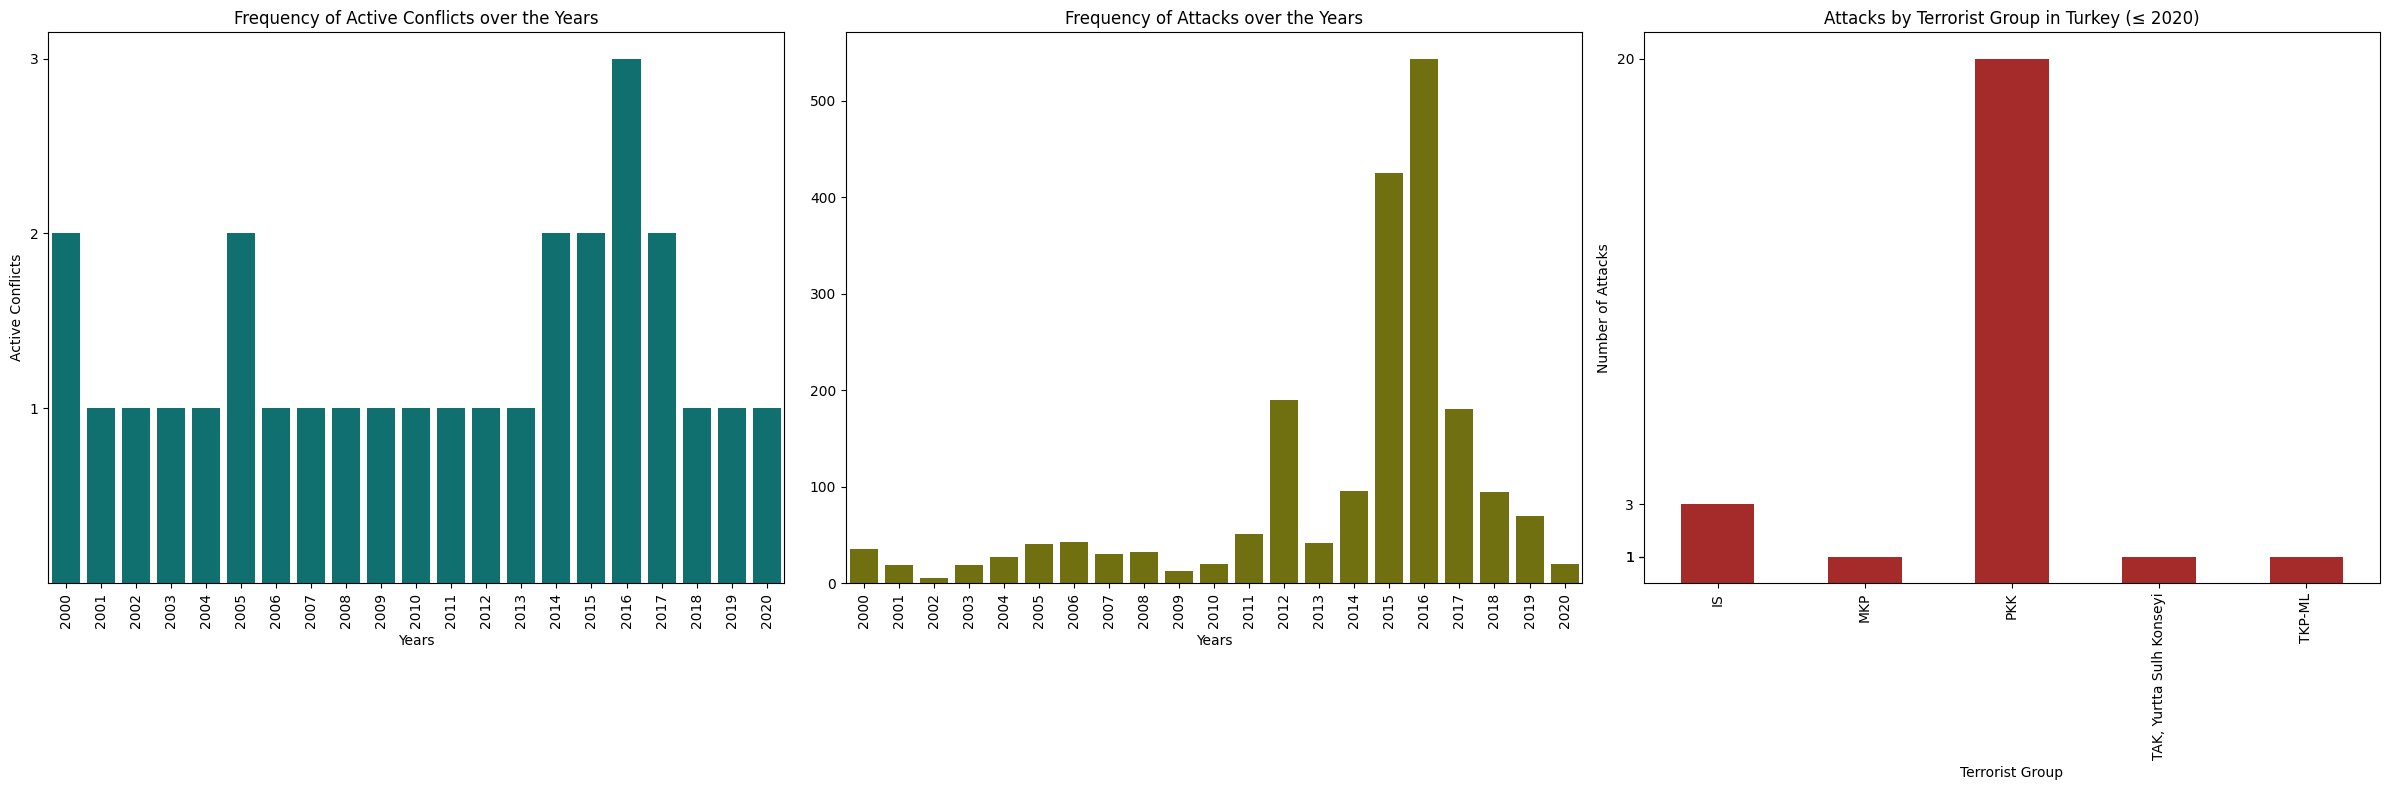

In [55]:
ig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Plot 1: Frequency of Active Conflicts
sns.barplot(ax=axes[0], x=merged.index, y=merged["Active Conflicts"], color='teal')
axes[0].set_title("Frequency of Active Conflicts over the Years")
axes[0].set_xlabel("Years")
axes[0].tick_params(axis='x', rotation=90)
axes[0].set_yticks([1, 2, 3])

# Plot 2: Frequency of Attacks
sns.barplot(ax=axes[1], x=merged.index, y=merged["Frequency of Attacks"].values, color='olive')
axes[1].set_title("Frequency of Attacks over the Years")
axes[1].set_xlabel("Years")
axes[1].tick_params(axis='x', rotation=90)

# Plot 3: Number of Attacks by Terrorist Group
df_filtered = df_Turkey[df_Turkey["year"] <= 2020].groupby("side_b").size()
df_filtered.plot(kind='bar', ax=axes[2], color='brown')
axes[2].set_title("Attacks by Terrorist Group in Turkey (≤ 2020)")
axes[2].set_xlabel("Terrorist Group")
axes[2].set_ylabel("Number of Attacks")
axes[2].set_yticks(df_filtered.values)

# Layout adjustment
plt.tight_layout()
plt.show()